# Overtraining 2

This code is bases on Adrian Bevan's "NN_parabola - This is a Multilayer Perceptron (MLP) example using Keras" jupyter notebook 

In [342]:
import tensorflow as tf
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Ntrain = 200
Ntest  = 100
xmin   =-10
xmax   = 10
Noise  = 0.15
print("\033[92mGenerating the parabola data set\033[0m")
X_train = []
Y_train = []
X_test  = []
Y_test  = []


#--------------------------------------------------------------------
def sim_parabola(xmin, xmax, Noise):
    """
    Function to simulate a random data point for a parabola
    """
    x = random.random()*(xmax-xmin)+xmin
    y = x*x*(1+random.random()*Noise)
    
    return x, y
#--------------------------------------------------------------------
  
for i in range( Ntrain ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_train.append(x)
  Y_train.append(y)

for i in range( Ntest ):
  x,y = sim_parabola(xmin, xmax, Noise)
  X_test.append(x)
  Y_test.append(y)

# convert to nparrays
x_test  = np.array(X_test)
y_test  = np.array(Y_test)
x_train = np.array(X_train)
y_train = np.array(Y_train)

print("Have generated the following data:")
print("\tN(test)  = ", len(x_test))
print("\tN(train) = ", len(x_train))


Generating the parabola data set
Have generated the following data:
	N(test)  =  100
	N(train) =  200


## Building the model

In [343]:
#
# Training configuration
#
ValidationSplit = 0.7
BatchSize       = 25
Nepochs         = 50
#DropoutValue    = 0.2

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_dim=1, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  tf.keras.layers.Dense(10, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
  #tf.keras.layers.Dropout(DropoutValue),
  tf.keras.layers.Dense(1)
])


print("--------------------------------------------------------------------------------------------------------------")
print("\033[92mWill train a multilayer perceptron using some toy data following y = x^2\033[0m")
print("--------------------------------------------------------------------------------------------------------------\n\n")
print("Input data MNIST")
#print("2 layer MLP with configuration 1:128:128:1")
#print("Dropout values       = ", DropoutValue)
print("Leaky relu parameter =  0.1")
print("ValidationSplit      = ", ValidationSplit)
print("BatchSize            = ", BatchSize)
print("Nepochs              = ", Nepochs)

# now specify the loss function 
loss_fn = tf.keras.losses.MeanSquaredError()

# now we can train the model to make predictions.
#   Use the ADAM optimiser
#   Specify the metrics to report as accuracy
#   Specify the loss function (see above)
# the fit step specifies the number of training epochs
model.compile(optimizer='adam', loss=loss_fn)
history  = model.fit(x_train, y_train, validation_split=ValidationSplit, batch_size=BatchSize, epochs=Nepochs)

--------------------------------------------------------------------------------------------------------------
Will train a multilayer perceptron using some toy data following y = x^2
--------------------------------------------------------------------------------------------------------------


Input data MNIST
Leaky relu parameter =  0.1
ValidationSplit      =  0.7
BatchSize            =  25
Nepochs              =  50
Train on 60 samples, validate on 140 samples
Epoch 1/50
60/60 [==============================] - 1s 12ms/sample - loss: 1508.9033 - val_loss: 2378.2037
Epoch 2/50
60/60 [==============================] - 0s 603us/sample - loss: 1503.6724 - val_loss: 2370.7855
Epoch 3/50
60/60 [==============================] - 0s 465us/sample - loss: 1498.4987 - val_loss: 2363.0967
Epoch 4/50
60/60 [==============================] - 0s 449us/sample - loss: 1493.2315 - val_loss: 2354.9939
Epoch 5/50
60/60 [==============================] - 0s 432us/sample - loss: 1487.4553 - val_loss: 23

## Output 

Display the evolution of the loss as a function of the training epoch

  N(Epochs)        =  50


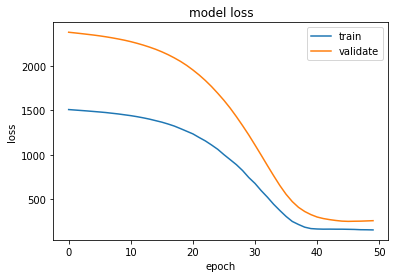

100/1 - 0s - loss: 451.3141
loss = 319.892

Display the model prediction against the ground truth from test data



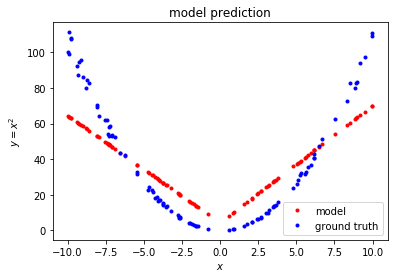


Display the difference between the model prediction and the ground truth from test data



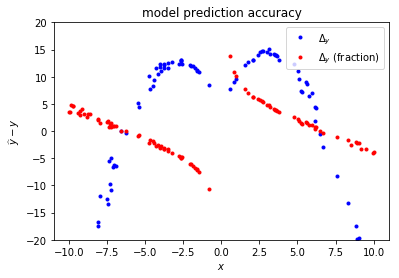

In [344]:
import matplotlib.pyplot as plt

print("\033[1mDisplay the evolution of the loss as a function of the training epoch\033[0m\n")
print("  N(Epochs)        = ", Nepochs)
#print("  loss (train)     = ", history.history['loss'])
#print("  loss (test)      = ", history.history['val_loss'])

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.clf()

# having finished training the model, use this to evaluate the performance on an
# independent sample of test data
loss = model.evaluate(x_test,  y_test, verbose=2)
print("loss = {:5.3f}".format(loss))

print("\n\033[1mDisplay the model prediction against the ground truth from test data\033[0m\n")

#
# use the model to make predictions based on the unseen test data
#
y_predict = model.predict(x_test)
plt.plot(x_test, y_predict, "r.")
plt.plot(x_test, y_test, "b.")
plt.title('model prediction')
plt.ylabel('$y=x^{2}$')
plt.xlabel('$x$')
plt.legend(['model', 'ground truth'], loc='lower right')
plt.show()
plt.clf()

print("\n\033[1mDisplay the difference between the model prediction and the ground truth from test data\033[0m\n")

delta = []
deltapc = []
for i in range(len(y_predict)):
    thedelta = y_predict[i]-y_test[i]
    delta.append( thedelta )
    if( x_test[i] ):
       deltapc.append( thedelta /  x_test[i] )
    else:
       deltapc.append( 0.0 )
    
plt.plot(x_test, delta, "b.")
plt.plot(x_test, deltapc, "r.")
plt.legend(['$\Delta_y$', '$\Delta_y$ (fraction)'], loc='upper right')
plt.title('model prediction accuracy')
plt.ylabel('$\widehat{y}-y$')
plt.xlabel('$x$')
plt.ylim(-20, 20)
plt.show()